In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt



# HK_SMALL

本实验是基于逐渐变大的策略来选取query的bound, 在单个hk数据集（黄埔48685372个点）上实验，记录了纯rtree， octree+rtree, octree+kdtree的构建时间和索引时间

In [2]:
file_path = "result_hkm/Result_OR.txt"
the_first = 1
time_list_or = []
count_list_or = []
the_last=1000000000

with open(file_path, "r") as file:
    for line in file:
        if(the_first):
            the_first = 0
            continue
        # Process each line here
        line = line.strip()  # Example: Print each line
        index = line.index("Time cost =") + len("Time cost =")
        words = line[index:].split()
        if float(words[0])>the_last*10.:
            continue
        time_list_or.append(float(words[0]))
        the_last = float(words[0])
        count_list_or.append(float(words[-2]))
        

In [4]:
file_path = "result_hkm/Result_R.txt"
the_first = 1
time_list_r = []
count_list_r = []
the_last=1000000000

with open(file_path, "r") as file:
    for line in file:
        if(the_first):
            the_first = 0
            continue
        # Process each line here
        line = line.strip()  # Example: Print each line
        index = line.index("Time cost =") + len("Time cost =")
        words = line[index:].split()
        if float(words[0])>the_last*10.:
            continue
        time_list_r.append(float(words[0]))
        the_last = float(words[0])
        count_list_r.append(float(words[-2]))

In [5]:
file_path = "result_hkm/Result_OK.txt"
the_first = 1
time_list_ok = []
count_list_ok = []
the_last=1000000000

with open(file_path, "r") as file:
    for line in file:
        if(the_first):
            the_first = 0
            continue
        # Process each line here
        line = line.strip()  # Example: Print each line
        index = line.index("Time cost =") + len("Time cost =")
        words = line[index:].split()
        if float(words[0])>the_last*10.:
            continue
        time_list_ok.append(float(words[0]))
        the_last = float(words[0])
        count_list_ok.append(float(words[-2]))

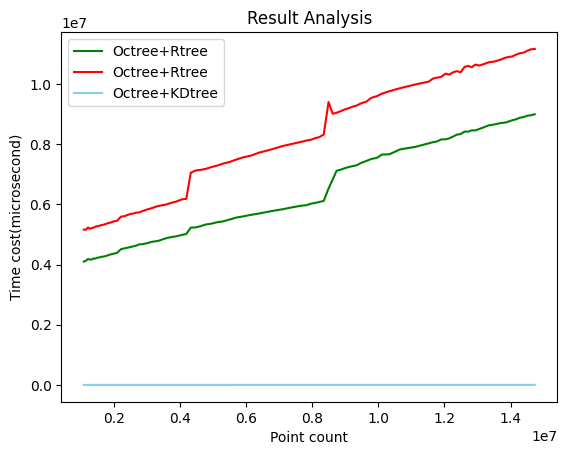

In [6]:
sub_axix = filter(lambda x:x%200 == 0, count_list_or)
plt.title('Result Analysis')
plt.plot(count_list_or, time_list_or, color='green', label='Octree+Rtree')
plt.plot(count_list_or, time_list_r, color='red', label='Octree+Rtree')
plt.plot(count_list_or, time_list_ok,  color='skyblue', label='Octree+KDtree')
# plt.plot(count_list_or, thresholds, color='blue', label='threshold')
plt.legend() # 显示图例


plt.xlabel('Point count')
plt.ylabel('Time cost(microsecond)')
plt.show()

值得注意的是，octree+rtree可以说是在多种场合，各种指标优于rtree，而octree+kdtree具有极度优秀的性能（平的是因为时间消耗太小了基本都是几microseconds），不知道什么原因。